In [1]:
import pandas as pd
import numpy as np

# Reading the dataset into python

In [2]:
data=pd.read_csv(r'C:\Users\Abhilash\Downloads\StudentsPerformance.csv')

In [3]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 1.Finding male and female participants

In [5]:
data1=data.sort_values('gender')
data1['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In the total 1000 students 518 are females and 482 are males.Females are more than males

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Students parental level of Education

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


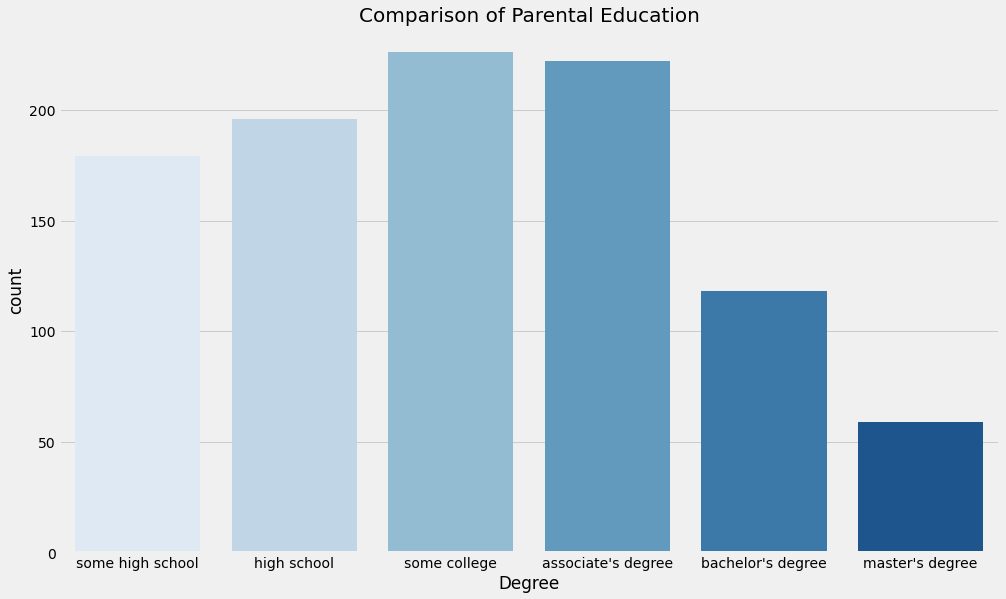

In [7]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Most of the students parental level of education is some college and associate's degree .Least parents have masters degree. 

# 3.Average for math,reading and writing based on gender

In [8]:
data.groupby(['gender']).agg(['mean'])

,math score,reading score,writing score
,mean,mean,mean
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In the case of females highest average score is for reading and then for writing.But in case of males highest average score is for maths and then for reading.

# Average for math,reading and writing based on test preparation course

In [9]:
data.groupby(['test preparation course']).agg(['mean'])

,math score,reading score,writing score
,mean,mean,mean
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


Students who completed the test preparation course have highest score in each field compare to others.Among students completed the course were show highest score in  writing and others show highest score in reading.

# 4.Scoring variation of math,reading and writing based on gender

In [10]:
data.groupby(['gender']).agg(['min','median','max'])

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0     65  100            17     73  100            10     74   
male           27     69  100            23     66  100            15     64   

             
        max  
gender       
female  100  
male    100

# Scoring variation based on test preparation course

Female and male students scores maximum score of 100 in each field.Minimum score in math,reading and writing scored by females.

In [11]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg(['min','median','max'])

math score             writing score         \
                                      min median  max           min median   
test preparation course gender                                               
completed               female         23     67   99            36     79   
                        male           39     74  100            38     71   
none                    female          0     62  100            10     70   
                        male           27     67   97            15     60   

                                    reading score              
                                max           min median  max  
test preparation course gender                                 
completed               female  100            40     78  100  
                        male    100            37     72  100  
none                    female  100            17     71  100  
                        male     92            23     63   96

In most of the cases female score minimum marks if they are participated in the course or not.From the data it is clear that students who completed the preparation course have higher score compared to others.

# 5.finding the top 25% of students based on maths score

In [12]:
data.nlargest(250,['math score'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
515,female,group E,some college,standard,none,100,92,97
516,female,group E,bachelor's degree,standard,none,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86
429,female,group E,some high school,standard,none,77,79,80
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64


In the given dataset there are 1000 students,25% of 1000 is 250.So that managment should gave bonus point to the top 250 students besed on maths score.Top 5 students have 100 marks and the last have scored 77 in maths.